**SHAP (SHapley Additive exPlanations) Values** is a popular method for explaining the output of machine learning models. SHAP values are based on cooperative game theory and provide insights into how features contribute to the predictions made by a model. In this tutorial, we will demonstrate how to use the SHAP library with a binary classification task using the Adult Income dataset.

### **Tutorial on Using SHAP Values with the Adult Income Dataset**

#### **1. Installing Required Libraries**

To get started, you'll need to install the required libraries. If you haven't already installed `shap` and `scikit-learn`, you can do so by running the following commands:


In [11]:
# pip install shap scikit-learn pandas


#### **2. Loading the Adult Income Dataset**

First, we need to load the Adult Income dataset. We'll use the `pandas` library to read the dataset directly from the UCI Machine Learning Repository.


In [12]:
import pandas as pd

# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
column_names = [
    'age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation',
    'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income'
]
df = pd.read_csv(url, names=column_names, sep=',\s', na_values=["?"], engine='python')

# Display the first few rows
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


#### **3. Preprocessing the Data**

Before we use the dataset for modeling, we'll need to preprocess it. This involves handling missing values, encoding categorical variables, and splitting the data into features and labels.

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Drop rows with missing values
df = df.dropna()

# Encode categorical variables
label_encoder = LabelEncoder()
for column in df.select_dtypes(include=['object']).columns:
    df[column] = label_encoder.fit_transform(df[column])

# Split data into features and target
X = df.drop('income', axis=1)
y = df['income']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### **4. Training a Machine Learning Model**

We'll use a simple Random Forest classifier for this binary classification task.

In [14]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Check model performance
print(f"Model Accuracy: {model.score(X_test, y_test):.2f}")

Model Accuracy: 0.86


#### **5. Using SHAP to Explain Model Predictions**


Now, we will use SHAP to explain the predictions made by our Random Forest model. SHAP provides a way to interpret the output of the model by computing the contribution of each feature to the prediction.


In [15]:
# !pip install ipywidgets
# !jupyter nbextension enable --py widgetsnbextension

# see: https://stackoverflow.com/questions/67998191/importerror-iprogress-not-found-please-update-jupyter-and-ipywidgets-although
from ipywidgets import FloatProgress

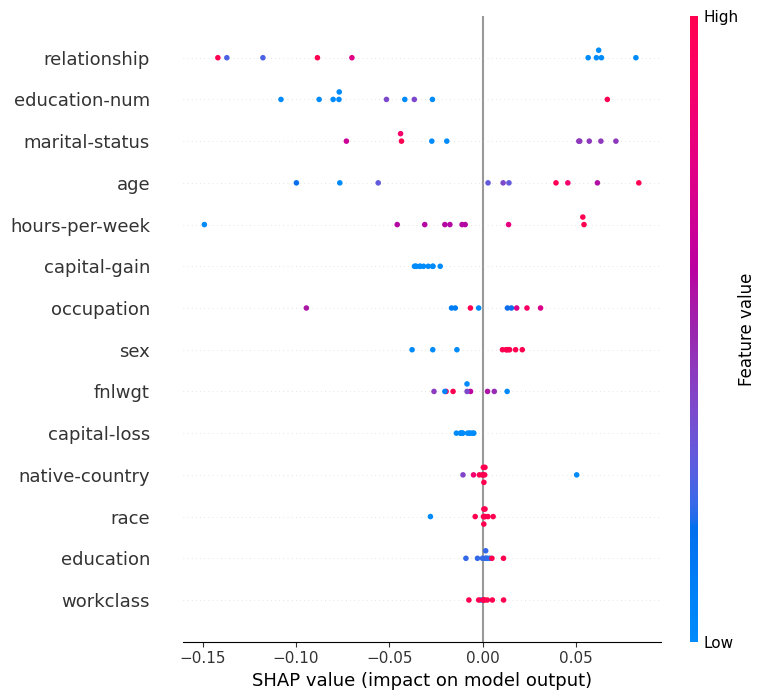

In [17]:
import shap

# Initialize the SHAP explainer
explainer = shap.TreeExplainer(model)

# Calculate SHAP values for the ten first examples of the test set
shap_values = explainer.shap_values(X_test[1:11])

# Summary plot for the chosen examples
shap.summary_plot(shap_values[1], X_test[1:11])

## `explainer = shap.TreeExplainer(model)`

The instruction `explainer = shap.TreeExplainer(model)` is a first step in the process of using the SHAP (SHapley Additive exPlanations) library to interpret machine learning models, specifically tree-based models like decision trees, random forests, gradient boosting machines (e.g., RandomForestClassifier, XGBoost, LightGBM, CatBoost), and others.

1. shap.TreeExplainer
- shap.TreeExplainer is a class provided by the SHAP library specifically designed to explain the outputs of tree-based machine learning models. It leverages optimized algorithms that are tailored for tree structures to compute SHAP values efficiently.

- SHAP values are based on the concept of Shapley values from cooperative game theory. They provide a way to fairly distribute the "payout" (in this case, the prediction made by the model) among the "players" (the features) based on their contribution to the prediction.

2. model
 - The model argument passed to TreeExplainer is the machine learning model you want to interpret. In the context of the provided code, model is an instance of RandomForestClassifier, a type of tree-based model.

 - By passing the model to shap.TreeExplainer, you are telling SHAP which model's predictions you want to explain.

3. What shap.TreeExplainer Does
- Initialization: When you create an instance of TreeExplainer, it initializes the explainer for the provided tree-based model. This involves understanding the structure of the model and preparing to calculate SHAP values for its predictions.

- Model-Specific Optimization: TreeExplainer uses an efficient algorithm tailored to the tree structure of the model, which allows it to compute SHAP values much faster than a general-purpose method would. This is particularly important for models with many trees or large datasets.

- Compatibility: TreeExplainer works with various tree-based models, including RandomForestClassifier, RandomForestRegressor, XGBClassifier, XGBRegressor, LGBMClassifier, LGBMRegressor, CatBoostClassifier, and CatBoostRegressor, among others. This makes it versatile and widely applicable.

## shap_values = explainer.shap_values(X_test[1:11])

The instruction `shap_values = explainer.shap_values(X_test[1:11])` in the provided code is used to compute the SHAP values for a subset of instances from the test dataset, `X_test`. Let’s break down what each part of this instruction does:

1. **`explainer.shap_values(X_test[1:11])`**:
   - **`explainer`**: This is an instance of the SHAP `TreeExplainer` class that has been initialized with the trained machine learning model (in this case, a Random Forest classifier). The explainer is responsible for calculating SHAP values, which quantify the contribution of each feature to the prediction made by the model.
   
   - **`shap_values`**: The method `shap_values()` is called on the `explainer` object. This method computes the SHAP values for the provided data. SHAP values are calculated for each feature of each instance in the dataset provided as input to this method.
   
   - **`X_test[1:11]`**: This is a slice of the test dataset `X_test`. Here, `X_test[1:11]` selects the rows from index 1 to 10 (inclusive of 1 and exclusive of 11) from `X_test`. This subset contains 10 instances of the test data. The slicing operation essentially selects these 10 instances for which the SHAP values will be calculated.

The purpose of the instruction `shap_values = explainer.shap_values(X_test[1:11])` is to compute the SHAP values for a specific subset of instances (rows 1 to 10) from the test dataset. 

By computing SHAP values for these 10 instances, you can:

- **Understand Individual Predictions**: SHAP values for these instances help explain how each feature contributed to the model’s prediction for each of these 10 instances.
  
- **Visualize Explanation for Specific Instances**: This can be particularly useful when you want to visualize or analyze the model’s behavior on specific data points, for example, to understand why the model made a particular decision.

### **Use Case Scenario**

Let's consider the following example to illustrate the use of this instruction:

- Suppose you have a model that predicts whether an individual earns more or less than $50,000 per year based on several features (like age, education, occupation, etc.). After training your model, you want to understand why the model predicted certain individuals in the test set to earn more than $50,000.

- You select a small subset of 10 instances from your test set (`X_test[1:11]`) to perform a detailed analysis. 

- By using `shap_values = explainer.shap_values(X_test[1:11])`, you compute the SHAP values for these 10 instances, allowing you to see the contribution of each feature (such as age or education level) to the model's prediction for each instance. 

- The computed SHAP values can then be visualized using various SHAP plots (like summary plots or force plots), which help in interpreting and explaining the model's predictions for these specific cases.

### **Summary**

The instruction `shap_values = explainer.shap_values(X_test[1:11])` is used to calculate the SHAP values for a specific subset of 10 instances from the test dataset. This helps in understanding the contribution of each feature to the model’s predictions for those specific instances, providing insights into the model’s decision-making process.

## shap.summary_plot(shap_values[1], X_test[1:11])

The instruction `shap.summary_plot(shap_values[1], X_test[1:11])` is used to create a summary plot using the SHAP (SHapley Additive exPlanations) library, which visualizes the SHAP values for a specific subset of the dataset. Let's break down this instruction to understand what it does:

### Components of the Instruction

1. **`shap.summary_plot()`**: This is a function from the SHAP library that generates a summary plot. The summary plot provides a high-level overview of the feature importance and the distribution of feature impacts on the model's output.

2. **`shap_values[1]`**:
   - **What it represents**: `shap_values` is a list of SHAP values generated by the SHAP explainer (`explainer.shap_values(X_test)` in this context). For a binary classification task, `shap_values` typically contains two arrays:
     - `shap_values[0]`: Corresponds to the SHAP values for class 0 (usually indicating the prediction is less than 50% probability for the positive class).
     - `shap_values[1]`: Corresponds to the SHAP values for class 1 (usually indicating the prediction is greater than 50% probability for the positive class).
   - **Why `shap_values[1]`**: We use `shap_values[1]` because we are interested in explaining the predictions for class 1, which is typically the "positive" class in a binary classification task.

3. **`X_test[1:11]`**:
   - **What it represents**: `X_test` is the test dataset that contains the features for model evaluation. `X_test[1:11]` is slicing this DataFrame to include only rows 1 to 10 (Python uses 0-based indexing, so `1:11` selects the second to the eleventh rows).
   - **Why `X_test[1:11]`**: By specifying `X_test[1:11]`, we are telling SHAP to generate the summary plot for a specific subset of 10 instances from the test dataset. This allows us to focus on a smaller, more manageable sample rather than the entire test set, which can be useful for detailed analysis or when dealing with a large dataset.

### What Does This Instruction Do?

The instruction `shap.summary_plot(shap_values[1], X_test[1:11])` creates a summary plot for the SHAP values corresponding to class 1 (the positive class) using the data from the second to the eleventh rows of the `X_test` DataFrame.

### Interpreting the Summary Plot

- **Feature Importance**: The plot ranks features based on their importance across the provided data subset. Features higher on the plot are more influential in the model’s predictions for the positive class.
- **Impact of Feature Values**: The summary plot displays how individual feature values impact the model’s output. Each dot represents a SHAP value for a feature and an instance in the dataset. The color of the dot represents the value of the feature (e.g., red for higher values and blue for lower values). 
- **Feature Impact Distribution**: The distribution of dots across the x-axis shows the range of impact each feature has on the model output, indicating whether the feature generally increases or decreases the prediction for the positive class.

This summary plot helps visualize which features most significantly contribute to the predictions for the positive class for the specific subset of data and how these features influence the predictions.

#### **6. Interpreting SHAP Plots**

- **Summary Plot**: The summary plot shows the impact of each feature on the model's output. Features are ranked by their importance. Each dot represents a SHAP value for a feature and an instance. The color represents the value of the feature (red high, blue low).

- **Dependence Plot**: This plot shows the relationship between the feature value and the SHAP value, indicating how changes in the feature impact the model prediction.


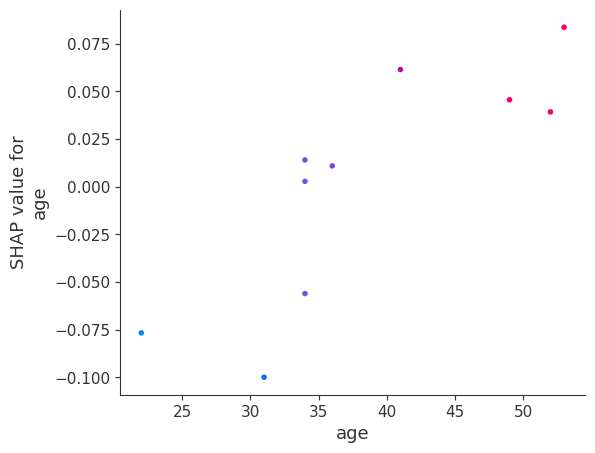

In [18]:
# Dependence plot for a specific feature
shap.dependence_plot("age", shap_values[1], X_test[1:11])


#### **7. SHAP Force Plot**

The force plot is useful for visualizing how different features contribute to a single prediction. It shows the pushing and pulling effect of each feature on the model's prediction.

In [19]:
# Force plot for the first instance in the test set
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1][0], X_test.iloc[0])

## shap.force_plot(explainer.expected_value[1], shap_values[1][0], X_test.iloc[0])

The instruction `shap.force_plot(explainer.expected_value[1], shap_values[1][0], X_test.iloc[0])` is used to create a **force plot** in SHAP, which visually explains how different features contribute to a single prediction made by a machine learning model. Let's break down each component of this instruction to understand its purpose and functionality:

### Components of the Instruction

1. **`explainer.expected_value[1]`**:
   - **What it is**: This represents the **baseline** or **expected value** of the model's output for the class being explained. In the context of SHAP values, this is the average model output over the training dataset for the target class. For binary classification problems, SHAP typically provides an `expected_value` for each class (e.g., `0` and `1`).
   - **In this case**: `explainer.expected_value[1]` refers to the baseline prediction for class `1` (e.g., predicting income >50K in the Adult Income dataset).

2. **`shap_values[1][0]`**:
   - **What it is**: This is the array of SHAP values for the features of the first instance in the test set (`X_test`). SHAP values quantify the contribution of each feature to the difference between the actual model output for the instance and the baseline output (`expected_value`).
   - **In this case**: `shap_values[1][0]` represents the SHAP values for class `1` for the first row of `X_test`. It shows how much each feature contributes to the prediction for class `1` for this specific instance.

3. **`X_test.iloc[0]`**:
   - **What it is**: This selects the first instance (row) of the test dataset `X_test`. The `iloc` method in pandas is used for index-based selection of rows and columns.
   - **In this case**: `X_test.iloc[0]` refers to the feature values of the first instance in the test set. These feature values are used to label the plot with the actual values that each feature takes for this instance.

### What the Instruction Does

The `shap.force_plot()` function generates a force plot, which is a visual representation of how individual features contribute to a specific prediction. 

- **Positive Contribution**: Features that increase the model's prediction (push the prediction towards a higher value, class 1 in this case) are shown in one color (usually red), and the length of the bar represents the magnitude of their contribution.
  
- **Negative Contribution**: Features that decrease the model's prediction (push it towards a lower value, class 0 in this case) are shown in another color (usually blue), with the length of the bar also representing the magnitude of their impact.

### In Summary

- The **force plot** created by this instruction visually breaks down the model's prediction for the first instance in `X_test` (for class `1`) by showing how each feature contributed to pushing the prediction higher or lower compared to the baseline (`expected_value`).
- It helps interpret why the model made the prediction it did, based on the contributions of individual features.
  
The force plot is particularly useful in understanding model predictions for specific instances, providing a detailed explanation of the underlying factors that influenced the decision.

#### **8. Conclusion**

SHAP values provide a powerful way to interpret machine learning models. By breaking down predictions into feature contributions, SHAP helps to understand how models make decisions and what features are most important. This tutorial has shown how to use SHAP with a Random Forest classifier on the Adult Income dataset to visualize feature importance and interpret individual predictions.

### **Key Takeaways**

- **SHAP** helps interpret the outputs of complex machine learning models by assigning each feature an importance value for each prediction.
- **Summary plots**, **dependence plots**, and **force plots** are powerful visual tools provided by SHAP to understand model behavior.
- SHAP values are particularly useful in environments where model transparency is crucial, such as in finance, healthcare, and regulatory scenarios. 

By understanding and utilizing SHAP, you can gain deeper insights into your machine learning models, leading to more transparent, interpretable, and reliable predictions.